# Dataset Cleaning and Vizualization

# Summary 

- **Loading Amazon Product Dataset**
- **Creating Sub Categories from Main Categories** 
- **Dropping Unnecessary Columns**
- **Dropping Rows with NaN Values**
- **Cleaning Selling Price Columns**
- **Converting Ounces to Pounds**
- **CLEANED DATASET** "df"


**Data Vizualization**
- **Product Count per Main Category**
- **Box Plot Price Distribution Sports & Outdoors**
- **Relationship between Selling Price and Shipping weight for products in Sports & Outdoors Category**


In [10]:
#import pandas and numpy
import pandas as pd
import numpy as np

# Show all columns
pd.pandas.set_option('display.max_columns', None)

# Display dataset
dataset = pd.read_csv("downloads/data.csv")

# Creating Sub Categories from Main Categories
Creating sub categories will allows us to have a more insightful analysis 

In [11]:
# New dataframe with the split categories 
# n = 3 is to get 3 split categories 
sub_categories = dataset["Category"].str.split("|", n = 3, expand = True)
sub_categories.head(5)

,0,1,2,3
0,Sports & Outdoors,Outdoor Recreation,"Skates, Skateboards & Scooters",Skateboarding | Standard Skateboards & Longbo...
1,Toys & Games,Learning & Education,Science Kits & Toys,None
2,Toys & Games,Arts & Crafts,Craft Kits,None
3,Toys & Games,Hobbies,Models & Model Kits,Model Kits | Airplane & Jet Kits
4,Toys & Games,Puzzles,Jigsaw Puzzles,None


In [12]:
# Renaming the sub categories and adding them to the initial dataset

# Main category
dataset["Main Category"]= sub_categories[0] 
  
# Sub category
dataset["Sub-Category"]= sub_categories[1]

# Sub-subcategory
dataset["Sub-subCategory"]= sub_categories[2]

# Complementary category
dataset["Complementary Category"]= sub_categories[3]

# Removing the initial "Main Category"
#dataset.drop(['Category'], axis=1)

In [13]:
# Checking that the spliting of categories worked
dataset.head(2)

,Uniq Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,About Product,Product Specification,Technical Details,Shipping Weight,Product Dimensions,Image,Variants,Sku,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description,Main Category,Sub-Category,Sub-subCategory,Complementary Category
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,NaN,10.7 pounds,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,Sports & Outdoors,Outdoor Recreation,"Skates, Skateboards & Scooters",Skateboarding | Standard Skateboards & Longbo...
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,The snap circuits mini kits classpack provides...,4 pounds,14.7 x 11.1 x 10.2 inches 4.06 pounds,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,Toys & Games,Learning & Education,Science Kits & Toys,None


# Dropping columns
- With Null values
- That are not useful for the analysis

In [14]:
# Dropping useless columns 
dropped_cols = [0,2,4,3,5,6,8,9,10,12,14,15,16,17,18,19,20,21,22,23,24,26,27]
dataset.drop(dataset.columns[dropped_cols], axis =1, inplace=True)

# Dropping rows with NaN values

In [15]:
# Dropping null values to avoid errors in the next part 
dataset.dropna(inplace = True)

# Cleaning Selling Price Column

In [39]:
# We are removing the $ sign by using the replace method
dataset['Selling Price'] = dataset['Selling Price'].str.replace('$', '')

# We need to rename the column so we know that the prices are in dollars
dataset = dataset.rename(columns={"Selling Price": "Selling Price $"})

# Changing type of column "Selling rice $" to numeric values for a later group by in Data Vizualization part 
dataset['Selling Price $'] = pd.to_numeric(df['Selling Price $'],errors='coerce')

# Checking that the column was renamed
dataset.head(2)

,Product Name,Selling Price $,Product Specification,Shipping Weight,Is Amazon Seller,Main Category,Sub-Category,Sub-subCategory,Complementary Category,Unit
0,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",237.68,Shipping Weight: 10.7 pounds (View shipping ra...,10.7,Y,Sports & Outdoors,Outdoor Recreation,"Skates, Skateboards & Scooters",Skateboarding | Standard Skateboards & Longbo...,pounds
3,Guillow Airplane Design Studio with Travel Cas...,28.91,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,13.4,Y,Toys & Games,Hobbies,Models & Model Kits,Model Kits | Airplane & Jet Kits,ounces


# Converting Ounces to Pounds

Splitting the Shipping Weight column into 2 columns: "Shipping Weight" and "Units"

In [17]:
# New dataframe with the split categories 
# n = 2 is to get 1 column "Shipping Weight" and another column "Units"
# I am doing this so that I can then convert the column shipping weight to pounds 
weight = dataset["Shipping Weight"].str.split(" ", n = 2, expand = True)
weight.head(5)

# New Shipping Weight column
dataset["Shipping Weight"]= weight[0] 
  
# New Unit column
dataset["Unit"]= weight[1]

dataset.head(5)

,Product Name,Selling Price $,Product Specification,Shipping Weight,Is Amazon Seller,Main Category,Sub-Category,Sub-subCategory,Complementary Category,Unit
0,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",237.68,Shipping Weight: 10.7 pounds (View shipping ra...,10.7,Y,Sports & Outdoors,Outdoor Recreation,"Skates, Skateboards & Scooters",Skateboarding | Standard Skateboards & Longbo...,pounds
3,Guillow Airplane Design Studio with Travel Cas...,28.91,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,13.4,Y,Toys & Games,Hobbies,Models & Model Kits,Model Kits | Airplane & Jet Kits,ounces
6,Rubie's Child's Pokemon Deluxe Pikachu Costume...,29.12,ProductDimensions:16x8x1inches|ItemWeight:1pou...,9.8,Y,"Clothing, Shoes & Jewelry",Costumes & Accessories,Kids & Baby,Girls | Costumes,ounces
8,"ARTSCAPE Etched Glass 24"" x 36"" Window Film, 2...",12.99,ProductDimensions:72x36x0inches|ItemWeight:11....,12.2,Y,Home & Kitchen,Home Décor,Window Treatments,Window Stickers & Films | Window Films,ounces
11,DC Cover Girls: Black Canary by Joëlle Jones S...,84.61,ProductDimensions:4x3x9.4inches|ItemWeight:2.0...,2.1,Y,Toys & Games,Collectible Toys,"Statues, Bobbleheads & Busts",Statues,pounds


Making a new dataframe called df from the dataset.

I will now put 2 columns side by side to get a better look of how I will convert the values in ounces to pounds

In [49]:
# To get a better look I just wanted to put side by side the "Shipping Weight" and "Unit" columns 
# Choosing only columns related to analysis
df = dataset[["Product Name", "Selling Price $", "Product Specification", "Shipping Weight","Unit", "Is Amazon Seller",
                 "Main Category", "Sub-Category", "Sub-subCategory", "Complementary Category"]]

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

df['Shipping Weight'] = pd.to_numeric(df['Shipping Weight'],errors='coerce')
df.head(2)

,Product Name,Selling Price $,Product Specification,Shipping Weight,Unit,Is Amazon Seller,Main Category,Sub-Category,Sub-subCategory,Complementary Category
0,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",237.68,Shipping Weight: 10.7 pounds (View shipping ra...,10.7,pounds,Y,Sports & Outdoors,Outdoor Recreation,"Skates, Skateboards & Scooters",Skateboarding | Standard Skateboards & Longbo...
3,Guillow Airplane Design Studio with Travel Cas...,28.91,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,13.4,ounces,Y,Toys & Games,Hobbies,Models & Model Kits,Model Kits | Airplane & Jet Kits


In [50]:
# Now I am converting the values to ounces on the CONDITON that the value in the same row and in the column "Unit" == "ounces"
df['Shipping Weight'] = np.where(df['Unit'] == 'ounces', df['Shipping Weight'] / 16, df['Shipping Weight'])

In [51]:
# Dropping the unit column because now all values in "Shipping Weight" is in pounds
df = df.drop('Unit', axis=1)
# Renaming the "Shipping Weight" column to "Shipping Weight lbs"
df = df.rename(columns={"Shipping Weight": "Shipping Weight lbs"})

# CLEANED DATASET

In [52]:
df.head(50)

,Product Name,Selling Price $,Product Specification,Shipping Weight lbs,Is Amazon Seller,Main Category,Sub-Category,Sub-subCategory,Complementary Category
0,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",237.68,Shipping Weight: 10.7 pounds (View shipping ra...,10.70000,Y,Sports & Outdoors,Outdoor Recreation,"Skates, Skateboards & Scooters",Skateboarding | Standard Skateboards & Longbo...
3,Guillow Airplane Design Studio with Travel Cas...,28.91,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,0.83750,Y,Toys & Games,Hobbies,Models & Model Kits,Model Kits | Airplane & Jet Kits
6,Rubie's Child's Pokemon Deluxe Pikachu Costume...,29.12,ProductDimensions:16x8x1inches|ItemWeight:1pou...,0.61250,Y,"Clothing, Shoes & Jewelry",Costumes & Accessories,Kids & Baby,Girls | Costumes
8,"ARTSCAPE Etched Glass 24"" x 36"" Window Film, 2...",12.99,ProductDimensions:72x36x0inches|ItemWeight:11....,0.76250,Y,Home & Kitchen,Home Décor,Window Treatments,Window Stickers & Films | Window Films
11,DC Cover Girls: Black Canary by Joëlle Jones S...,84.61,ProductDimensions:4x3x9.4inches|ItemWeight:2.0...,2.10000,Y,Toys & Games,Collectible Toys,"Statues, Bobbleheads & Busts",Statues
17,Flash Furniture 25''W x 45''L Trapezoid Red HP...,117.26,ASIN:B00777W7GE|ShippingWeight:39pounds(Viewsh...,39.00000,Y,Home & Kitchen,Furniture,Kids' Furniture,Tables & Chairs | Tables
21,Team Associated 9665 Hinge Pin Brace with Hing...,10.99,ProductDimensions:5.8x0.2x3.4inches|ItemWeight...,0.10000,Y,Toys & Games,Hobbies,Hobby Building Tools & Hardware,RC Linkages
32,Jay Franco Disney Frozen 2 Forest Spirit Twin/...,36.37,PackageDimensions:16.9x11.5x6.7inches|ItemWeig...,4.23000,Y,Home & Kitchen,Bedding,Kids' Bedding,Comforters & Sets | Comforter Sets
34,"Forum Novelties Union Officer Child's Costume,...",21.07,ProductDimensions:13x10x2inches|ItemWeight:8ou...,0.80000,Y,"Clothing, Shoes & Jewelry",Costumes & Accessories,Kids & Baby,Boys | Costumes
44,"Disney's Alice in Wonderland, ""The Hatter's Ma...",35.00,ProductDimensions:60x48x0.1inches|ItemWeight:1...,1.64000,Y,Home & Kitchen,Bedding,Kids' Bedding,Blankets & Throws | Throws


In [53]:
df.dtypes

Product Name               object
Selling Price $           float64
Product Specification      object
Shipping Weight lbs       float64
Is Amazon Seller           object
Main Category              object
Sub-Category               object
Sub-subCategory            object
Complementary Category     object
dtype: object

# Data Vizualization

**Product Count per Main Category**

In [90]:
# Creating a smaller dataframe to only vizualize The 
# I decided to use the Selling Price $ to count the amount of times each product appears in a main category
df_product_count = df.groupby(['Main Category'])['Product Name'].count()
df_product_count = df_product_count.to_frame()
df_product_count = df_product_count.reset_index()
df_product_count

,Main Category,Product Name
0,"Arts, Crafts & Sewing",105
1,Automotive,2
2,Baby Products,78
3,Beauty & Personal Care,8
4,"Clothing, Shoes & Jewelry",256
5,Electronics,4
6,Grocery & Gourmet Food,11
7,Health & Household,15
8,Hobbies,18
9,Home & Kitchen,508


Text(0, 0.5, 'Count of products')

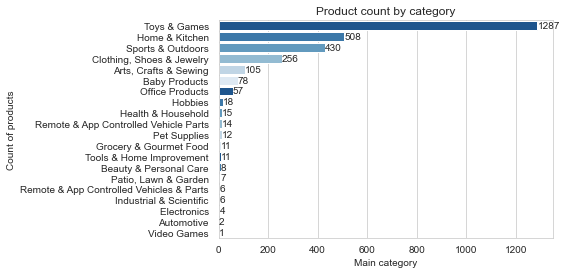

In [136]:
# Loading the plot with the right data 
ax = sns.countplot(y='Main Category', data=dataset, order=order,palette=sns.color_palette("Blues_r"))

# Having the values in descending order
order = dataset['Main Category'].value_counts()[:20].index


# Designing plot
ax.bar_label(ax.containers[0])
plt.title("Product count by category")
plt.xlabel("Main category")
plt.ylabel("Count of products")

**Box Plot Price Distribution Sports & Outdoors**

Text(0.5, 1.0, 'Distribution of the Prices in Sports & Outdoors')

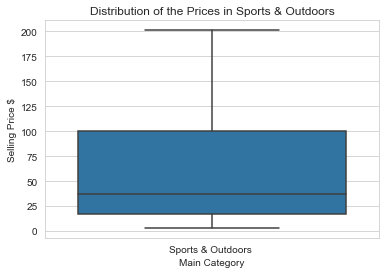

In [163]:
# Creating box plot
sports = df[df["Main Category"] == 'Sports & Outdoors ']
sns.boxplot(data = sports, x='Main Category', y='Selling Price $', showfliers=False)

# Naming box plot
plt.title("Distribution of the Prices in Sports & Outdoors")

**Scatter Plot Correlation between "Selling Price" and "Shipping weight lbs" : Sports & Outdoors Category**

<AxesSubplot:xlabel='Selling Price $', ylabel='Shipping Weight lbs'>

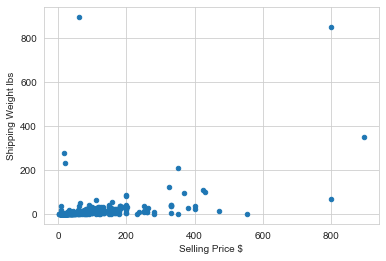

In [167]:
# Creating scatterplot for products in " Sports & Outdoors" Main category

sports.plot.scatter(x = 'Selling Price $', y = "Shipping Weight lbs")